__Importing the library required in this project__
-----

In [1]:
import tensorflow as tf

__Loading the MNIST(“Modified National Institute of Standards and Technology") dataset from tensorflow.keras library in mnist variable__
---------

In [2]:
mnist = tf.keras.datasets.mnist

#Here x_train and x_test contain the image data in 28x28 and y_train and y_test is the number attached to that image data
(x_train, y_train),(x_test, y_test) = mnist.load_data()


__Visualizing our x_train data which is in the form of image using matplotlib.pyplot__
---------

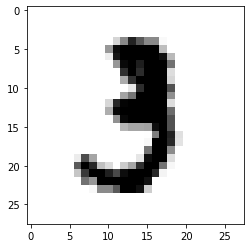

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10],cmap=plt.cm.binary) #In x_train at index 10, we have element 3 in the position which we visualized through pyplot library
#cmap=The Colormap instance or registered colormap name used to map scalar data to colors(Taken from matplotlib documentation)
plt.show()

In [4]:
#Printing the corresponding value to the image shown by x_train[10] by y_train[10]
print(y_train[10])

3


__Normalizing the big data which we have in x_train and x_test to manipulate it easily and to make the process fast__
-------

In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
#Normalization
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

__Normalization usually fades the pixels as big values are converted to small decimal values__

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

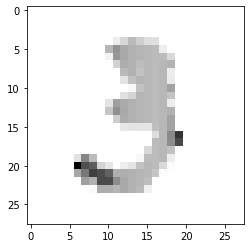

In [7]:
print(x_train[10])

plt.imshow(x_train[10],cmap=plt.cm.binary)
plt.show()

__Building the model for testing__
------

In [8]:
#Build a Model
model = tf.keras.models.Sequential()

#Sequential() method will create linear stack of different layers

In [9]:
#Input layer should be flat as said above but our images are in the form of 28*28 binary data.
#So flatten them to 1*784
model.add(tf.keras.layers.Flatten())

In [10]:
print("We will have 128 neurons in each layer which will be connected to all the input data")
print("Adding layers will increase the number of neural networks combination will increase the complexity of model and will yield better accuracy")
print("But more layers will increase the time complexity so an optimum choice should be selected")
print("How many layer you want to add(At least you should add 4-5 layers)? ",end="")
x=int(input())

We will have 128 neurons in each layers which will be connected to all the input data
Adding layers will increase the number of neural networks combination will increase the complexity of model and will yield better accuracy
But more layers will increase the time complexity so an optimum choice should be selected
How many layer you want to add(At least you should add 4-5 layers)? 5


In [11]:
#Adding Layers
for i in range(x):
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#We are using Dense here to assure that we have a fully connected network

In [12]:
#Adding Output Layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Here the last layers contains 10 neurons because we have digits from 0 to 9 only
#Softmax basically yields that output for which probability is highest than for other cases

__Training the model__
-----

In [13]:
#Train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


__Neural network should focus less loss before having higher accuracy__

In [14]:
print("Less epochs will create more loss but takes less time than more epochs.")
print("At least you should take 8 epoches for better optimisation and to yield good accuracy and less loss")
print("How many epochs you want to run? ",end="")
x=int(input())
model.fit(x_train, y_train, epochs=x)

Less epochs will create more loss but takes less time than more epochs.
At least you should take 8 epoches for better optimisation and to yield good accuracy and less loss
How many epochs you want to run? 10
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4709 - accuracy: 0.8529
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1207 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.97 - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0632 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9859: 0s - l
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 8/10
1875/1875 [======

In [15]:
#To see the total loss and accuracy from the model in which we have fitted our training data set
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1070 - accuracy: 0.9782
0.10699068754911423
0.9782000184059143


__Saving the Model__
----

In [16]:
model.save('MNIST_epic_number_reader.model')

INFO:tensorflow:Assets written to: MNIST_epic_number_reader.model\assets


__Loading the Model Back__
--

In [18]:
new_model = tf.keras.models.load_model('MNIST_epic_number_reader.model')

__To check whether our model is giving proper output depending upon x_test__
--

In [21]:
#Printing the values of prediction for x_test
#x_test is an nd array of size 10000 x 10 ,so predictions will be of the same order
prediction = new_model.predict(x_test) #Here prediction is holding the probabilities of various numbers in a particular dataset out of 10000
print(prediction)

[[4.07106857e-12 3.71532027e-09 1.14365726e-08 ... 1.00000000e+00
  1.22490559e-11 4.54031035e-10]
 [3.34236458e-11 1.00478806e-10 1.00000000e+00 ... 4.53618618e-08
  8.06993494e-09 2.53271471e-13]
 [4.57791450e-16 1.00000000e+00 1.45342445e-11 ... 1.39868074e-11
  4.45217481e-08 4.75032860e-12]
 ...
 [1.72076877e-08 5.51845609e-08 1.32867328e-07 ... 1.61136015e-07
  8.90018583e-08 3.37293216e-07]
 [1.62902753e-16 2.38337308e-19 6.78500019e-16 ... 5.22176436e-16
  1.04454578e-09 6.38320993e-13]
 [4.20604246e-10 1.95526401e-10 2.21805018e-12 ... 2.51100772e-20
  3.66289998e-09 3.43147386e-12]]


In [28]:
#To see which number corresponds to the maximum value of predictions[500]
import numpy as np
print(np.argmax(predictions[500]))

3


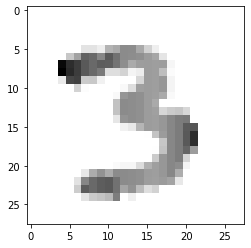

3


In [29]:
#To check whether our model predicted correct answer by visualizing which number is present in x_test at index 5 
#and what is the corresponding correct value as provided in y_test
plt.imshow(x_test[500],cmap=plt.cm.binary)
plt.show()
print(y_test[500])